# <center> <span style="color:lightgreen">**Probability Distribution Functions**</span>

### Probability Mass Function (PMF) --> <span style="color:red">**Continuous Random Variable**</span>
$$PDF=\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}}(\frac{x-\mu}{\sigma})^2 $$
### Probability Distrubution Function (PDF) --> <span style="color:red"> **Discrete Random Variable**</span>
### Cummulative Distribution Function (CDF) --> <span style="color:red">****</span>
$$cdf=\frac{1}{2}[1+erf(\frac{x-\mu}{\sigma\sqrt{2}})]$$

https://www.youtube.com/watch?v=6Z8SdN52GuU

<img src="Descrete_statistics.excalidraw.png">

- PDF : Bell curve e.g weight,age,
- PMF : Descret type curve e.g stages, catogry 
- CDF : S type curve e.g  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy.stats import ttest_ind,ttest_1samp,ttest_rel
from scipy.stats import levene 
from scipy.stats import shapiro 
import scipy.stats as stats
import random
%matplotlib inline

In [149]:
L=[]
for i in range(10_000):
   L.append(random.randint(1,6))

len(L)

10000

In [150]:
L[:5]

[2, 3, 3, 3, 3]

In [151]:
s=(pd.Series(L).value_counts() / pd.Series(L).value_counts().sum()).sort_index()
s

1    0.1663
2    0.1653
3    0.1697
4    0.1604
5    0.1705
6    0.1678
dtype: float64

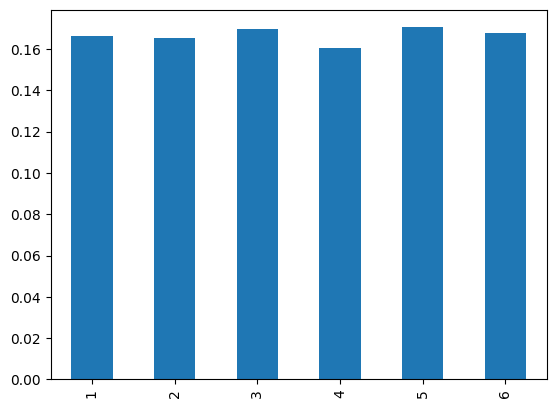

In [152]:
s.plot(kind="bar");

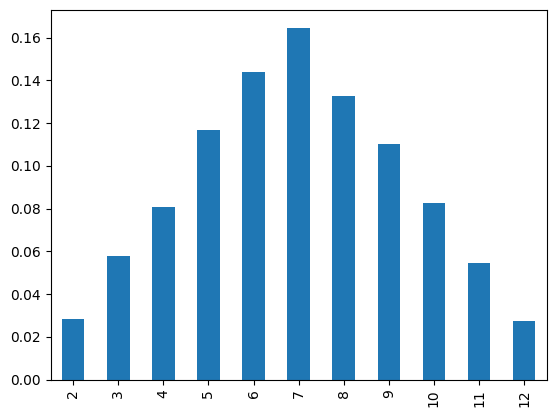

In [153]:
L1=[]
for i in range(10_000):
   a=random.randint(1,6)
   b=random.randint(1,6)
   L1.append(a+b)

s1=(pd.Series(L1).value_counts() / pd.Series(L1).value_counts().sum()).sort_index()
s1.plot(kind="bar");

# CDF

$$f(x)=P(X<=x)$$

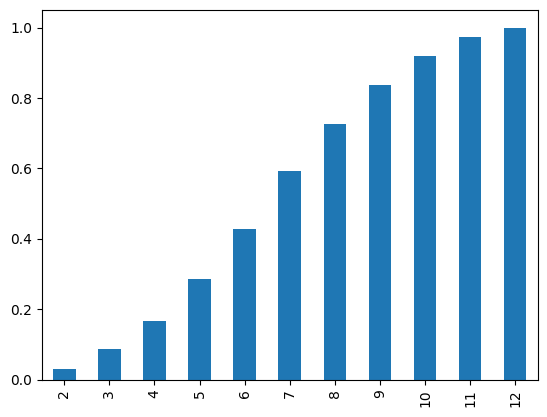

In [154]:
np.cumsum(s1).plot(kind="bar");

# Probability Density Function (PDF)

In [155]:
from numpy.random import  normal

sample=normal(loc=50,scale=5,size=1000)

(array([  3.,  10.,  54., 149., 277., 257., 156.,  70.,  20.,   4.]),
 array([32.00013964, 35.51466376, 39.02918787, 42.54371199, 46.0582361 ,
        49.57276022, 53.08728433, 56.60180845, 60.11633256, 63.63085668,
        67.14538079]),
 <BarContainer object of 10 artists>)

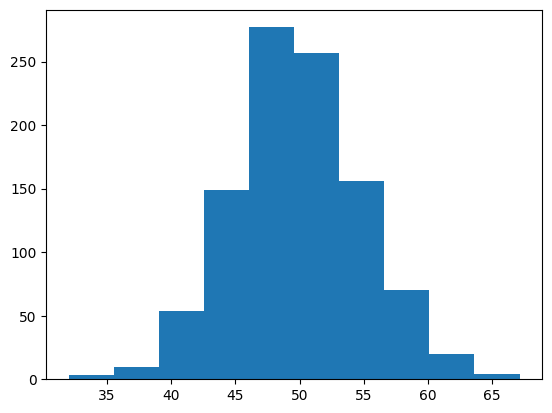

In [156]:
# plot histogram to understand the distribution
plt.hist(sample,bins=10)

In [157]:
sample_mean=sample.mean()
sample_std=sample.std()


In [158]:
from scipy.stats import norm

dist=norm(sample_mean,sample_std)

In [159]:
values=np.linspace(sample.min(),sample.max(),100)

In [160]:
probabilities=[dist.pdf(value) for value in values]

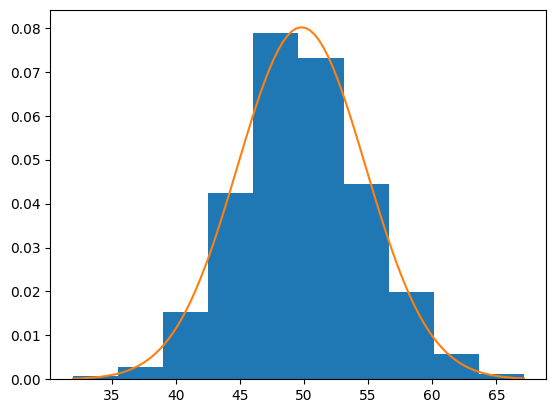

In [161]:
plt.hist(sample,bins=10,density=True);
plt.plot(values,probabilities);

C:\Users\ACER\AppData\Local\Temp\ipykernel_11752\2326547216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample);


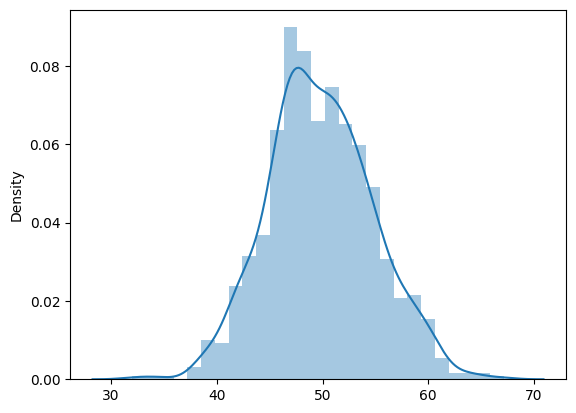

In [177]:
sns.distplot(sample);

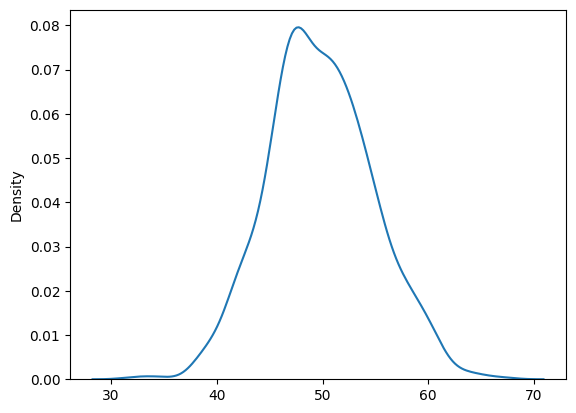

In [187]:
sns.kdeplot(sample);

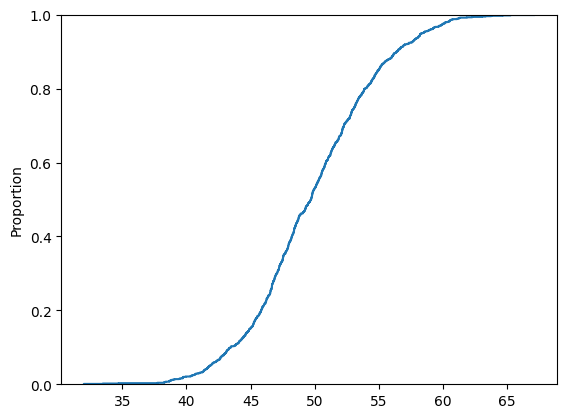

In [189]:
#cdf
sns.ecdfplot(sample);

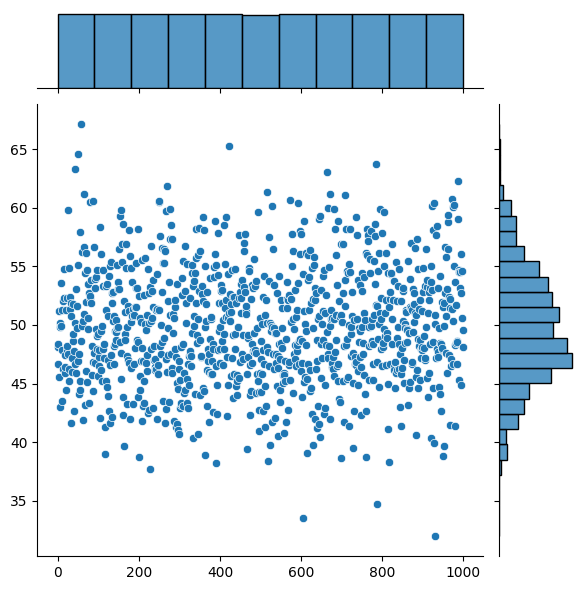

In [181]:
sns.jointplot(sample);

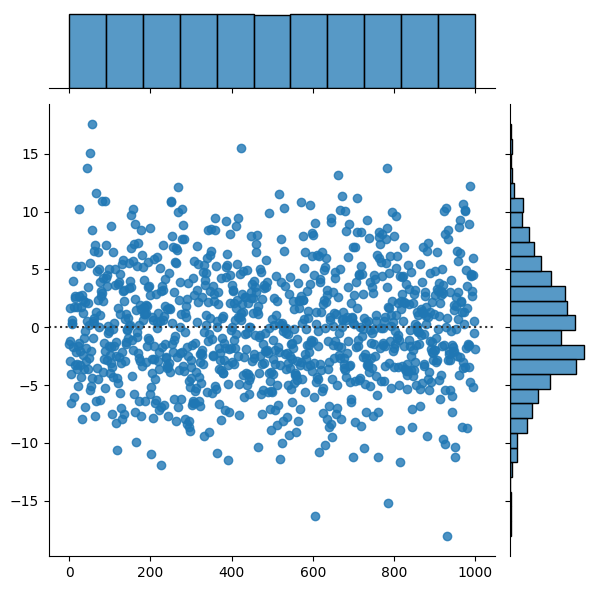

In [185]:
#sns.jointplot(sample,kind="reg");
#sns.jointplot(sample,kind="kde");
sns.jointplot(sample,kind="resid");

# <center> <span style="color:red"> **Hypothesis Testing**

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy.stats import ttest_ind,ttest_1samp,ttest_rel
from scipy.stats import levene 
from scipy.stats import shapiro 

%matplotlib inline

In [163]:
titanic = pd.read_csv("titanic.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


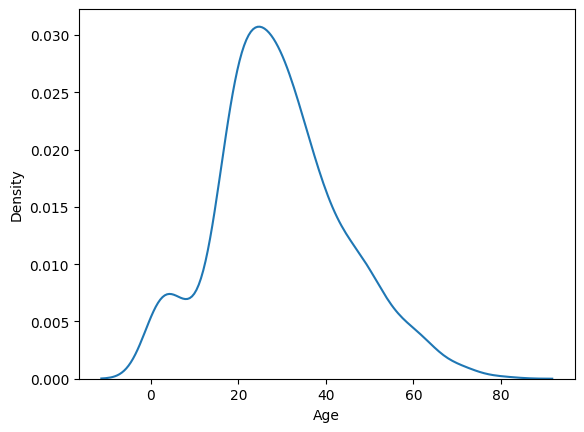

In [190]:
sns.kdeplot(titanic["Age"]);

Transform to z-test

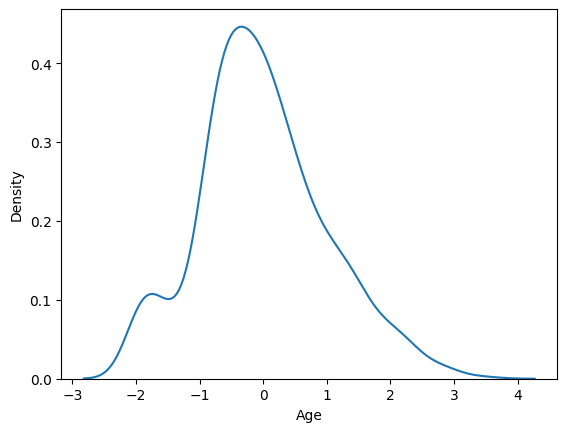

In [191]:
x=(titanic["Age"]-titanic["Age"].mean())/titanic["Age"].std()
sns.kdeplot(x);

# <center> **Use Case**
<span>https://www.youtube.com/watch?v=ADqYqSdtyW8 1:09</span> 

Suppose hights of adults men in a certen population follow a normal distribution with a mean of <span style="color:red">_68_</span> inches and standard deviation of <span style="color:red">_3_</span> inches. what is the probability that a random selected adult male from this population
is taller then <span style="color:red">_72_</span> inches

In [192]:
titanic["Age"].skew()

0.38910778230082704

<span style="color:red">**Hypothesis testing on AGE column**

In [164]:
# 
pop=titanic["Age"].dropna()
sample_age=pop.sample(25).values
sample_age

array([26. , 36. , 61. , 27. , 29. , 26. , 25. , 30. , 26. , 29. ,  1. ,
       33. , 21. , 24. , 20.5, 21. , 65. , 54. , 11. , 17. , 16. , 48. ,
       25. ,  9. , 24. ])

In [165]:
sample_age.mean()

28.18

### $H_0$ --> the mean age is 35

### $H_1$ --> the mean age is less then 35



In [166]:
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)

print(shapiro_age)

ShapiroResult(statistic=0.9005821347236633, pvalue=0.01888997107744217)


In [167]:
pop.mean()

29.69911764705882

In [168]:
pop_mean = 35

In [169]:
import scipy.stats as stats

t_statistics, p_value =stats.ttest_1samp(sample_age,35)

print("t_statistics : " ,t_statistics)
print("p_value : " ,p_value/2)

t_statistics :  -2.254737451383502
p_value :  0.01677407088939073


In [170]:
alpha= 0.05

In [171]:
if p_value<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject the Null Hypothesis


comparing mean age of male and Female age

In [172]:
pop_male=titanic[titanic["Sex"]=="male"]["Age"].dropna()

pop_female=titanic[titanic["Sex"]=="female"]["Age"].dropna()

In [173]:
pop_male,pop_female;

In [174]:
sample_male=pop_male.sample(25)
sample_female=pop_female.sample(25)

# alpha=0.05